In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings

warnings.filterwarnings('ignore')

In [2]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [3]:
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
df = yf.download(tickers=symbols_list, 
                 start=start_date, 
                 end=end_date)
df = df.stack()
df

[*********************100%%**********************]  503 of 503 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Adj Close       Close        High         Low        Open  \
Date                                                                          
2015-09-29 A      31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL    37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL   24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV   36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT    33.644733   39.500000   40.150002   39.029999   39.259998   
...                     ...         ...         ...         ...         ...   
2023-09-26 YUM   122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH   111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA  223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION   33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS   176.048248  176.869995  178.449997  176.270004  176.580002   

                      Volume  
Date                          
2015-09-29 A       2252400.0  
           AAL     7478800.0  
           AAPL  293461600.0  
           ABBV   12842800.0  
           ABT    12287500.0  
...                      ...  
2023-09-26 YUM     1500600.0  
           ZBH     3610500.0  
           ZBRA     355400.0  
           ZION    1586100.0  
           ZTS     1463200.0  

[993179 rows x 6 columns]

In [4]:
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

In [5]:
#calculate features and technical indicators for each stock

In [6]:
#Garman-Klass Volatility
df['garman_klass_vol'] = (((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*(np.log(df['adj close'])-np.log(df['open']))**2)
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol  
date       ticker                                 
2015-09-29 A         2252400.0         -0.000926  
           AAL       7478800.0         -0.000443  
           AAPL    293461600.0         -0.005572  
           ABBV     12842800.0         -0.051964  
           ABT      12287500.0         -0.008803  
...                        ...               ...  
2023-09-26 YUM       1500600.0          0.000002  
           ZBH       3610500.0          0.000161  
           ZBRA       355400.0          0.000133  
           ZION      1586100.0          0.000188  
           ZTS       1463200.0          0.000072  

[993179 rows x 7 columns]

<Axes: xlabel='date'>

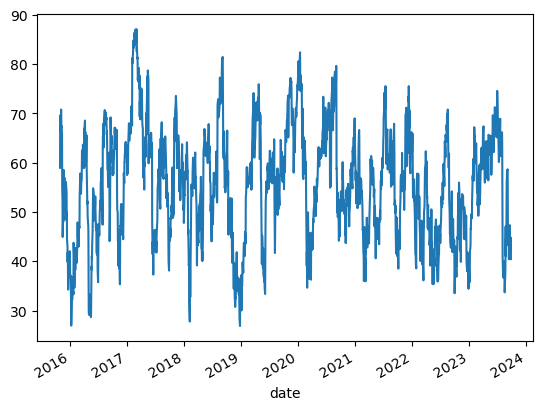

In [7]:
#RSI
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

#test
df.xs('AAPL', level=1)['rsi'].plot()

In [8]:
#Bollinger Bands
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707778  3.517162   
           ZTS       1463200.0          0.000072  42.623481  5.158939   

                     bb_mid   bb_high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-09-26 YUM     4.846536  4.876502  
           ZBH     4.789615  4.829283  
           ZBRA    5.539167  5.677342  
           ZION    3.572582  3.628001  
           ZTS     5.217753  5.276568  

[993179 rows x 11 columns]

In [9]:
#ATR
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'], 
                        low=stock_data['low'], 
                        close=stock_data['close'], 
                        length=14)
    #normalize data
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707778  3.517162   
           ZTS       1463200.0          0.000072  42.623481  5.158939   

                     bb_mid   bb_high       atr  
date       ticker                                
2015-09-29 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2023-09-26 YUM     4.846536  4.876502  0.142547  
           ZBH     4.789615  4.829283 -0.381708  
           ZBRA    5.539167  5.677342 -0.057389  
           ZION    3.572582  3.628001 -0.161699  
           ZTS     5.217753  5.276568  0.651515  

[993179 rows x 12 columns]

In [10]:
#MACD
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    #normalize data
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707778  3.517162   
           ZTS       1463200.0          0.000072  42.623481  5.158939   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-09-29 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-26 YUM     4.846536  4.876502  0.142547 -1.363695  
           ZBH     4.789615  4.829283 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZION    3.572582  3.628001 -0.161699 -0.164625  
           ZTS     5.217753  5.276568  0.651515 -1.188278  

[993179 rows x 13 columns]

In [32]:
#Dollar Volume in millions
df['dollar_volume'] = (df['adj close'] * df['volume'])/1e6
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534702   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.684566   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674244   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644733   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     122.811577  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.231342   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048248  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005572        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000002  36.057165  4.816569   
           ZBH       3610500.0          0.000161  31.893251  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000188  46.707778  3.517162   
           ZTS       1463200.0          0.000072  42.623481  5.158939   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.028763  
           AAL          NaN       NaN       NaN       NaN     279.420098  
           AAPL         NaN       NaN       NaN       NaN    7243.972380  
           ABBV         NaN       NaN       NaN       NaN     470.999980  
           ABT          NaN       NaN       NaN       NaN     413.409662  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.846536  4.876502  0.142547 -1.363695     184.291052  
           ZBH     4.789615  4.829283 -0.381708 -0.881067     404.350437  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.572582  3.628001 -0.161699 -0.164625      52.708232  
           ZTS     5.217753  5.276568  0.651515 -1.188278     257.593797  

[993179 rows x 14 columns]

In [43]:
#aggregate to monthly level and filter top 150 most liquid stocks for each month
#reduces training time and experiment with features and strategies, convert business-daily data to month-end frequency
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A          136.213752   39.086578         -0.001902  73.421335   
           AAL        287.915803   39.429932         -0.000966  40.718967   
           AAPL      4029.441898   26.890562         -0.003209  55.537320   
           ABBV       340.716455   40.770771         -0.056745  49.376879   
           ABT        212.708753   38.483482         -0.010572  56.962580   
...                          ...         ...               ...        ...   
2023-09-30 OTIS       154.983158   78.671936         -0.000020  33.116219   
           ABNB      1633.500725  132.279999          0.000213  44.494127   
           CEG        197.358104  108.239204          0.000220  55.245466   
           GEHC       212.350630   66.153511          0.000185  40.922326   
           KVUE       677.910277   20.218124          0.000032  35.706337   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.547568  3.620020  3.692471 -1.033887  0.567157  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418772  
           AAPL    3.282983  3.326297  3.369611 -0.967900 -0.142790  
           ABBV    3.735768  3.784026  3.832284 -0.526809  0.145677  
           ABT     3.660875  3.682732  3.704588 -1.064842  0.335556  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.374104  4.419394  4.464683 -1.028320 -1.534536  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.655604  4.695779  4.735953 -0.436215  0.366876  
           GEHC    4.155782  4.213319  4.270855 -0.893478 -1.116463  
           KVUE    3.024299  3.099281  3.174263 -0.899746 -1.435621  

[46894 rows x 9 columns]

In [44]:
#calculate 5-year rolling average of dollar volume for each stocks before filtering
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))
data =data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-10-31 AAL      39.134331         -0.000176  62.203526  3.604673   
           AAPL     26.248030         -0.002384  49.891108  3.295542   
           ABBV     40.620975         -0.044217  27.477766  3.762524   
           ABT      34.463528         -0.006968  38.008778  3.559438   
           ACN     103.970657         -0.004320  53.823674  4.641169   
...                       ...               ...        ...       ...   
2023-09-30 WMT      53.966232          0.000011  54.722509  3.991704   
           XOM     114.292961          0.000026  59.440189  4.695106   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-10-31 AAL     3.655494  3.706314  0.402199  1.131595  
           AAPL    3.324423  3.353305 -1.038688 -0.195978  
           ABBV    3.816700  3.870876 -0.893132 -0.760593  
           ABT     3.609919  3.660400 -1.035224 -0.650889  
           ACN     4.652807  4.664445 -0.996806 -0.135456  
...                     ...       ...       ...       ...  
2023-09-30 WMT     4.009176  4.026648 -0.196381  0.399458  
           XOM     4.735205  4.775304  0.601335  1.400623  
           MRNA    4.685332  4.788149 -0.529511 -0.376899  
           UBER    3.862227  3.917801 -0.746098 -0.133973  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  

[12516 rows x 8 columns]

In [49]:
#calculate monthly returns for different time horizons as features
def calculate_returns(df):
    
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                            .pct_change(lag)
                            .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                    upper=x.quantile(1-outlier_cutoff)))
                            .add(1)
                            .pow(1/lag)
                            .sub(1))
    return df    

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-10-31 AAL      34.426762          0.000304  48.657563  3.400271   
           AAPL     52.266766         -0.000366  50.232937  3.939815   
           ABBV     61.053268         -0.029657  30.334069  4.118012   
           ABT      63.088444         -0.002603  51.539003  4.118583   
           ACN     146.420563         -0.001386  44.756197  4.938323   
...                       ...               ...        ...       ...   
2023-09-30 WFC      40.009789          0.000016  40.920287  3.702645   
           WMT      53.966232          0.000011  54.722509  3.991704   
           XOM     114.292961          0.000026  59.440189  4.695106   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-10-31 AAL     3.510083  3.619895  1.903100 -1.299271  -0.151222   
           AAPL    3.978181  4.016548 -0.265596 -0.447838  -0.030477   
           ABBV    4.239722  4.361431  0.530626 -1.979973  -0.168082   
           ABT     4.160597  4.202611 -0.049420 -0.515303  -0.056387   
           ACN     5.003039  5.067756 -0.205759 -1.025606  -0.065448   
...                     ...       ...       ...       ...        ...   
2023-09-30 WFC     3.743015  3.783384 -0.558742 -0.282325  -0.015500   
           WMT     4.009176  4.026648 -0.196381  0.399458  -0.000677   
           XOM     4.735205  4.775304  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-10-31 AAL     -0.069086  -0.038273  -0.032300  -0.046697   -0.023033  
           AAPL    -0.019453   0.048955   0.049216   0.031518    0.023037  
           ABBV    -0.090323  -0.051576  -0.031893  -0.036005   -0.009087  
           ABT      0.017673   0.018393   0.030307   0.013075    0.021747  
           ACN     -0.030053  -0.000564   0.008483  -0.000163    0.010026  
...                      ...        ...        ...        ...         ...  
2023-09-30 WFC     -0.057917  -0.013554   0.016712   0.000702    0.003255  
           WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  

[8288 rows x 14 columns]

In [ ]:
#44.53